# Graphs - NetworkX

- **Created by Andrés Segura Tinoco**
- **Created on Nov 27, 2019**

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [1]:
# Load the Python libraries
import networkx as nx
import math
import timeit

In [2]:
# Load Plotting libraries
import matplotlib.pyplot as plt

In [3]:
print('Networkx version:', nx.__version__)

Networkx version: 2.3


## 1. Graph or Undirected Simple Graph (USG)

A graph (sometimes called undirected graph for distinguishing from a directed graph) is a pair $ G = (V, E) $, where $V$ is a set whose elements are called vertices (singular: vertex), and $E$ is a set of two-sets (sets with two distinct elements) of vertices, whose elements are called edges (sometimes links or lines).

In [4]:
# Create an empty Undirected Simple Graph (USG)
usg = nx.Graph()

In [5]:
# Add nodes
usg.add_nodes_from(["1", "2", "3", "4", "5"])
print(usg.nodes())

['1', '2', '3', '4', '5']


In [6]:
# Add edges
usg.add_edges_from([("1","2"), ("1","3"), ("1","4"), ("1","5"), ("3","2"), ("4","2"), ("4","3"), ("5","4")])
print(usg.edges())

[('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('3', '4'), ('4', '5')]


In [7]:
# Function that calculates the graph density
def get_graph_density(g):
    n_nodes = len(g.nodes())
    n_edges = len(g.edges())
    
    if nx.is_directed(g):
        density = n_edges / (n_nodes * (n_nodes - 1))
    else:
        density = 2 * n_edges / (n_nodes * (n_nodes - 1))
    
    return density

In [8]:
# Calculate the graph density
density = get_graph_density(usg)
print('Graph density:', density)

Graph density: 0.8


In [9]:
# Get neighbors of node "1"
list(usg.neighbors("1"))

['2', '3', '4', '5']

In [10]:
# Get nodes positions with spring layout
pos = nx.layout.spring_layout(usg)
pos

{'1': array([-0.04051526, -0.37535376]),
 '2': array([-0.81206532, -0.00441395]),
 '3': array([-0.44112035,  0.68033829]),
 '4': array([0.29370093, 0.23977966]),
 '5': array([ 1.        , -0.54035024])}

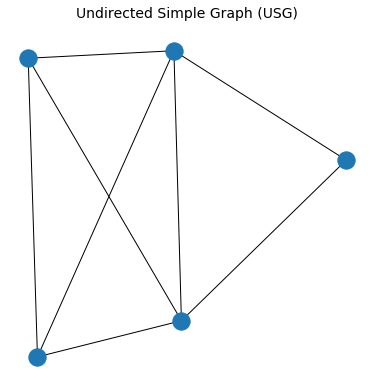

In [11]:
# Plot Simple Graph (free format)
plt.rcParams["figure.figsize"] = [5, 5]
nx.draw(usg)
plt.title('Undirected Simple Graph (USG)', fontsize=14)
plt.axis('off')
plt.show()

## 2. Minimum Spanning Tree (MST)

A minimum spanning tree (MST) or minimum weight spanning tree is a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight.

In [12]:
# Create an empty Undirected Weighted Graph (UWG)
uwg = nx.Graph()

In [13]:
# Add nodes
nodes_list = ["1", "2", "3", "4", "5", "6", "7"]
uwg.add_nodes_from(nodes_list)

In [14]:
# Add weighted edges
edges = [("1","2",1), ("1","4",4), ("2","3",2), ("2","4",6), ("2","5",4), ("3","5",5), 
         ("3","6",6), ("4","5",3), ("4","7",4), ("5","6",8), ("5","7",7), ("6","7",3)]
uwg.add_weighted_edges_from(edges)

In [15]:
# Calculate the graph density
density = get_graph_density(uwg)
print('Graph density:', density)

Graph density: 0.5714285714285714


In [16]:
# Calculate a minimum spanning tree of an undirected weighted graph with the Kruskal algorithm
mst = nx.minimum_spanning_tree(uwg, algorithm='kruskal')
print(sorted(mst.edges(data=True)))

[('1', '2', {'weight': 1}), ('1', '4', {'weight': 4}), ('2', '3', {'weight': 2}), ('4', '5', {'weight': 3}), ('4', '7', {'weight': 4}), ('6', '7', {'weight': 3})]


### 2.1. MST from Scratch with the Prim algorithm

In [17]:
# Find the minimum spanning tree into the graph
def get_prim_mst(uwg, verbose=False):
    start_time = timeit.default_timer()
    min_tree = []
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return min_tree

In [18]:
# Calculate a minimum spanning tree from scratch with the Prim algorithm
mst2 = get_prim_mst(uwg, True)
print(sorted(mst2))

>> elapsed time 0.00039999999999999996 ms
[]


### 2.2. Plot Minimum Spanning Tree

In [19]:
# We then set the coordinates of each node
uwg.node['1']['pos'] = (0, 2)
uwg.node['2']['pos'] = (3, 2)
uwg.node['3']['pos'] = (6, 2)
uwg.node['4']['pos'] = (0, 0)
uwg.node['5']['pos'] = (3, 0)
uwg.node['6']['pos'] = (6, 0)
uwg.node['7']['pos'] = (3,-2)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(uwg, 'pos')

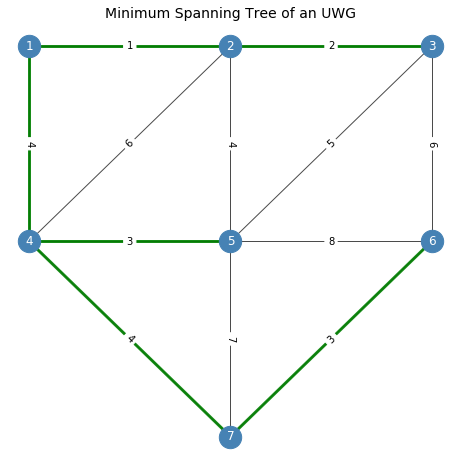

In [20]:
# Nodes labels
labels = {}
for n in uwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for s, t, w in edges:
    weights[(s, t)] = w

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 8]
nx.draw_networkx_nodes(uwg, pos, nodelist=uwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(uwg, pos, edgelist=uwg.edges(), width=1, alpha=0.7, edge_color='black')
nx.draw_networkx_edges(uwg, pos, edgelist=mst.edges(), width=3, alpha=0.9, edge_color='green')
nx.draw_networkx_labels(uwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(uwg, pos, edge_labels=weights, font_color='black')
plt.title('Minimum Spanning Tree of an UWG', fontsize=14)
plt.axis('off')
plt.show()

 ## 3. Directed Weighted Graph (DWG)

A directed graph or digraph is a graph in which edges have orientations.

In [21]:
# Create an empty Directed Weighted Graph (DWG)
dwg = nx.DiGraph()

In [22]:
# Add nodes
nodes_list = ["1", "2", "3", "4", "5"]
dwg.add_nodes_from(nodes_list)

In [23]:
# Add weighted edges
edges = [("1","2",50), ("1","3",30), ("1","4",100), ("1","5",10), ("3","2",5), ("4","2",20), ("4","3",50), ("5","4",10)]
dwg.add_weighted_edges_from(edges)

In [24]:
# Calculate the graph density
density = get_graph_density(dwg)
print('Graph density:', density)

Graph density: 0.4


In [25]:
# We then set the coordinates of each node
dwg.node['1']['pos'] = (0, 0)
dwg.node['2']['pos'] = (2, 2)
dwg.node['3']['pos'] = (2,-2)
dwg.node['4']['pos'] = (5, 2)
dwg.node['5']['pos'] = (5,-2)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(dwg, 'pos')

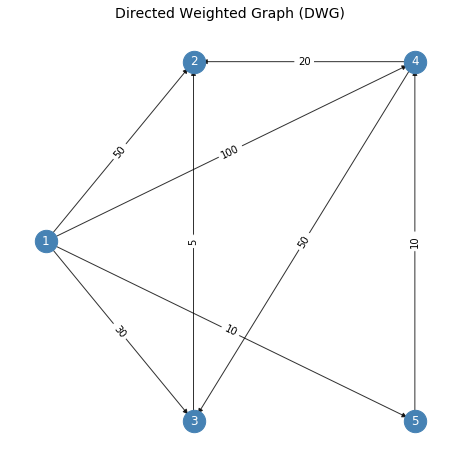

In [26]:
# Nodes labels
labels = {}
for n in dwg.nodes():
    labels[n] = n

# Edges labels
weights = {}
for s, t, w in edges:
    weights[(s, t)] = w

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 8]
nx.draw_networkx_nodes(dwg, pos, nodelist=dwg.nodes(), node_color='steelblue', node_size=500, alpha=1)
nx.draw_networkx_edges(dwg, pos, edgelist=dwg.edges(), width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_labels(dwg, pos, labels, font_size=12, font_color='w')
nx.draw_networkx_edge_labels(dwg, pos, edge_labels=weights, font_color='black')
plt.title('Directed Weighted Graph (DWG)', fontsize=14)
plt.axis('off')
plt.show()

 ### Shortest Path

In [27]:
# Using Dijkstra algorithm
sp = nx.dijkstra_path(dwg, source = '1', target = '2')
sp

['1', '3', '2']

In [28]:
# Using Dijkstra algorithm
sp = nx.dijkstra_path_length(dwg, source = '1', target = '2')
sp

35

## 4. Dijkstra Algorithm

Given a directed graph $ G = \langle V, E \rangle $, the time complexity of Dijkstra's algorithm is $ \Theta (V^2) $ but with **min-priority queue** it drops down to $ \Theta((E + V) \thinspace log{V}) $.

Below, a detailed version of the Dijkstra algorithm for directed graphs with edges with positive weights is shown.

In [29]:
# Returns the node with a minimum own distance
def get_min_node(nodes, weights):
    min_node = ''
    min_weigth = math.inf
    
    for n in nodes:
        w = weights[n]
        if w < min_weigth:
            min_node = n
            min_weigth = w
    
    return min_node

In [30]:
# A detailed version of the Dijkstra algorithm for directed graphs with edges with positive weights 
def get_dijkstra_dist(graph, source, verbose=False):
    nodes = list(graph.nodes())
    edges = graph.edges()
    
    # Init distances
    dists = dict()
    for n in nodes:
        dists[n] = (0 if n == source else math.inf)
    paths = dict()
    for n in nodes:
        paths[n] = source
    
    # Greedy cycle
    v = source
    while len(nodes) > 1:        
        nodes.remove(v)
        if verbose:
            print('>> curr node:', v, ', len:', len(nodes))
        
        # Update weights
        for w in nodes:
            if (v, w) in edges:
                if dists[w] > dists[v] + edges[v, w]['weight']:
                    dists[w] = dists[v] + edges[v, w]['weight']
                    paths[w] = v
                    if verbose:
                        print('   v:', v, ', w:', w, ', weigth:', dists[w])
        
        # Get the node with a minimum own distance
        v = get_min_node(nodes, dists)
        if v == '':
            break
            
    return { 'distances': dists, 'paths': paths }

In [31]:
# Show shortes path from source node to target node
def get_shortes_path(dwg, source, target, verbose=False):
    
    # Validation
    if not source in dwg.nodes() or not target in dwg.nodes():
        print('Both the source and the target must exist in the graph.')
        return {}
    
    start_time = timeit.default_timer()
    
    # Get the distance from 'source' to the other nodes
    sol = get_dijkstra_dist(dwg, source, verbose)
    paths = sol['paths']
    
    # Get shortest path from 'source' to 'target'
    path = []
    ix = target
    while ix != source:
        path.append(ix)
        ix = paths[ix]
    path.append(source)
    path.reverse()
    
    weight = sol['distances'][target]
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print('>> elapsed time', elapsed, 'ms')
    
    return { 'path': path, 'weight': weight }

In [32]:
# Example of the shortes path calculation from '5' to '2'
source = '1'
target = '2'
get_shortes_path(dwg, source, target, True)

>> curr node: 1 , len: 4
   v: 1 , w: 2 , weigth: 50
   v: 1 , w: 3 , weigth: 30
   v: 1 , w: 4 , weigth: 100
   v: 1 , w: 5 , weigth: 10
>> curr node: 5 , len: 3
   v: 5 , w: 4 , weigth: 20
>> curr node: 4 , len: 2
   v: 4 , w: 2 , weigth: 40
>> curr node: 3 , len: 1
   v: 3 , w: 2 , weigth: 35
>> elapsed time 29.537900000000008 ms


{'path': ['1', '3', '2'], 'weight': 35}

---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>